# 🛠️ 1. Preparação dos Dados

## Importando bibliotecas e dados do dataset

In [285]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE




In [286]:
#carregando o dataset
df = pd.read_csv('/content/dados_tratados.csv')
df.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,TenureCategory
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,Novo (0-9 meses)
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,Novo (0-9 meses)
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,Novo (0-9 meses)


## 1.1 Verificação e limpeza dos dados

In [287]:
#verificar se o tratamento dos dados está correto
print("Informações do DataFrame:")
df.info()
print("\nValores Ausentes:")
print(df.isnull().sum())
print("\nValores em branco")
print(df.isna().sum())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract        

## 1.2 Remoção de colunas irrelevantes

A coluna 'customerID' não terá ultilidade por ter justamente valores únicos em cada linha e podem prejudicar o desempenho do modelo

In [288]:
df= df.drop('customerID', axis=1)
df= df.drop('TenureCategory', axis=1)
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Contas_Diarias'],
      dtype='object')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


## 1.3 Encoding


In [290]:
# Definindo as colunas categóricas e numéricas
categorical_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaymentMethod' ]
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

# Criando o transformador de colunas
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Mantém as colunas numéricas sem alteração
)

# Aplicando o one-hot encoding
df_encoded = pd.DataFrame(column_transformer.fit_transform(df),
                         columns=column_transformer.get_feature_names_out())

# Exibindo as primeiras linhas do dataframe codificado
df_encoded.head(3)

,cat__gender_Male,cat__MultipleLines_Yes,cat__InternetService_Fiber optic,cat__InternetService_No,cat__OnlineSecurity_Yes,cat__OnlineBackup_Yes,cat__DeviceProtection_Yes,cat__TechSupport_Yes,cat__StreamingTV_Yes,cat__StreamingMovies_Yes,...,remainder__Churn,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Contas_Diarias
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.186667
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.996667
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.463333


## 1.4 Verificação da Proporção de Evasão

Contagem de clientes ativos (Churn=0): 5174
Contagem de clientes evadidos (Churn=1): 1869
Proporção de evadidos em relação aos ativos: 0.36
Percentual de evadidos no total: 26.54%
Percentual de ativos no total: 73.46%

Proporções normalizadas:
Churn
0    0.73463
1    0.26537
Name: count, dtype: float64

Há desequilíbrio entre as classes: A classe majoritária é 'Não Evadidos' (Churn=0).
Isso pode impactar modelos preditivos, causando viés para a classe majoritária.
Recomendações: Usar técnicas como oversampling (SMOTE), undersampling, pesos de classe ou métricas como F1-score/ROC-AUC.


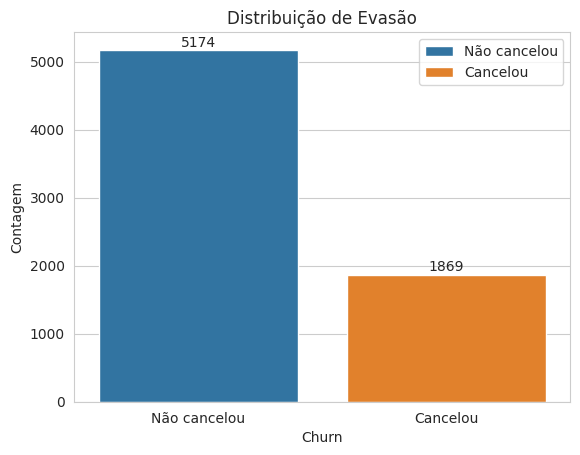

,count
Churn,
0,5174
1,1869


In [291]:


# Calculando contagens e proporções
churn_count = df['Churn'].value_counts()
proportion_evadidos_ativos = churn_count[1] / churn_count[0]
proportion_evadidos_total = churn_count[1] / len(df) * 100
proportion_ativos_total = churn_count[0] / len(df) * 100

# Exibindo resultados
print(f"Contagem de clientes ativos (Churn=0): {churn_count[0]}")
print(f"Contagem de clientes evadidos (Churn=1): {churn_count[1]}")
print(f"Proporção de evadidos em relação aos ativos: {proportion_evadidos_ativos:.2f}")
print(f"Percentual de evadidos no total: {proportion_evadidos_total:.2f}%")
print(f"Percentual de ativos no total: {proportion_ativos_total:.2f}%")
print("\nProporções normalizadas:")
print(churn_count / len(df))

# Avaliação de desequilíbrio
if proportion_evadidos_ativos < 0.5:
    print("\nHá desequilíbrio entre as classes: A classe majoritária é 'Não Evadidos' (Churn=0).")
    print("Isso pode impactar modelos preditivos, causando viés para a classe majoritária.")
    print("Recomendações: Usar técnicas como oversampling (SMOTE), undersampling, pesos de classe ou métricas como F1-score/ROC-AUC.")

# Visualização personalizada
ax = sns.countplot(x='Churn', hue='Churn', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Evasão')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.legend(loc='upper right', labels=['Não cancelou', 'Cancelou'])

# Adicionando valores nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{int(height)}', ha='center')

plt.show()

# Exibindo contagens em DataFrame
pd.DataFrame(churn_count)

## 1.5 Balanceamento de Classes

Distribuição original das classes:
remainder__Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
remainder__Churn
0    5174
1    1869
Name: count, dtype: int64

Distribuição após SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Churn
0    5174
1    5174
Name: count, dtype: int64


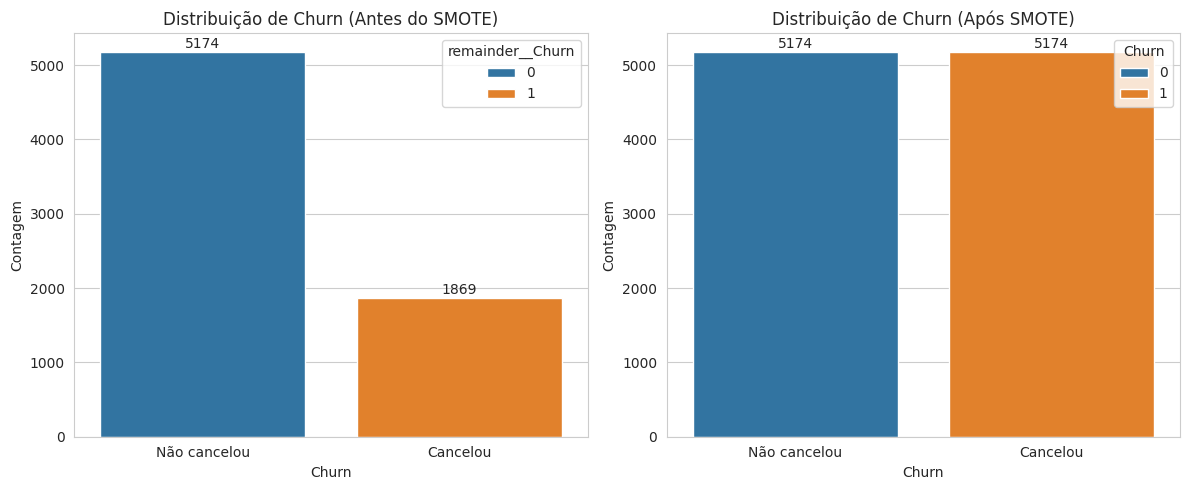


Tamanho do dataset original: 7043
Tamanho do dataset após SMOTE: 10348


In [292]:
from imblearn.over_sampling import SMOTE


# Separando features (X) e alvo (y)
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'Churn' in col])
y = df_encoded[[col for col in df_encoded.columns if 'Churn' in col]].iloc[:, 0].astype(int)  # Converte para int

# Exibindo a distribuição original das classes
print("Distribuição original das classes:")
print(y.value_counts(normalize=True))
print(y.value_counts())

# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convertendo para DataFrame/Series
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='Churn')

# Exibindo a distribuição após SMOTE
print("\nDistribuição após SMOTE:")
print(y_resampled.value_counts(normalize=True))
print(y_resampled.value_counts())

# Visualização da distribuição antes e depois do SMOTE
plt.figure(figsize=(12, 5))

# Gráfico antes do SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn (Antes do SMOTE)')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.xlabel('Churn')
plt.ylabel('Contagem')
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 50, f'{int(height)}', ha='center')

# Gráfico depois do SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn (Após SMOTE)')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.xlabel('Churn')
plt.ylabel('Contagem')
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 50, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()

# Verificação adicional: tamanho do dataset
print(f"\nTamanho do dataset original: {len(X)}")
print(f"Tamanho do dataset após SMOTE: {len(X_resampled)}")

## 1.6 Normalização ou Padronização

In [304]:

# Avaliação da padronização para os modelos escolhidos
print("\nAvaliação da padronização:")
print("1. Regressão Logística: Requer padronização (já aplicada) devido à sensibilidade à escala.")
print("2. SVM: Requer padronização (já aplicada) para cálculos de distância precisos.")
print("3. Random Forest: Não requer padronização, mas usará os mesmos dados preprocessados para consistência.")


Avaliação da padronização:
1. Regressão Logística: Requer padronização (já aplicada) devido à sensibilidade à escala.
2. SVM: Requer padronização (já aplicada) para cálculos de distância precisos.
3. Random Forest: Não requer padronização, mas usará os mesmos dados preprocessados para consistência.


# 🎯 2. Correlação e Seleção de Variáveis

##  2.1 Análise de Correlação

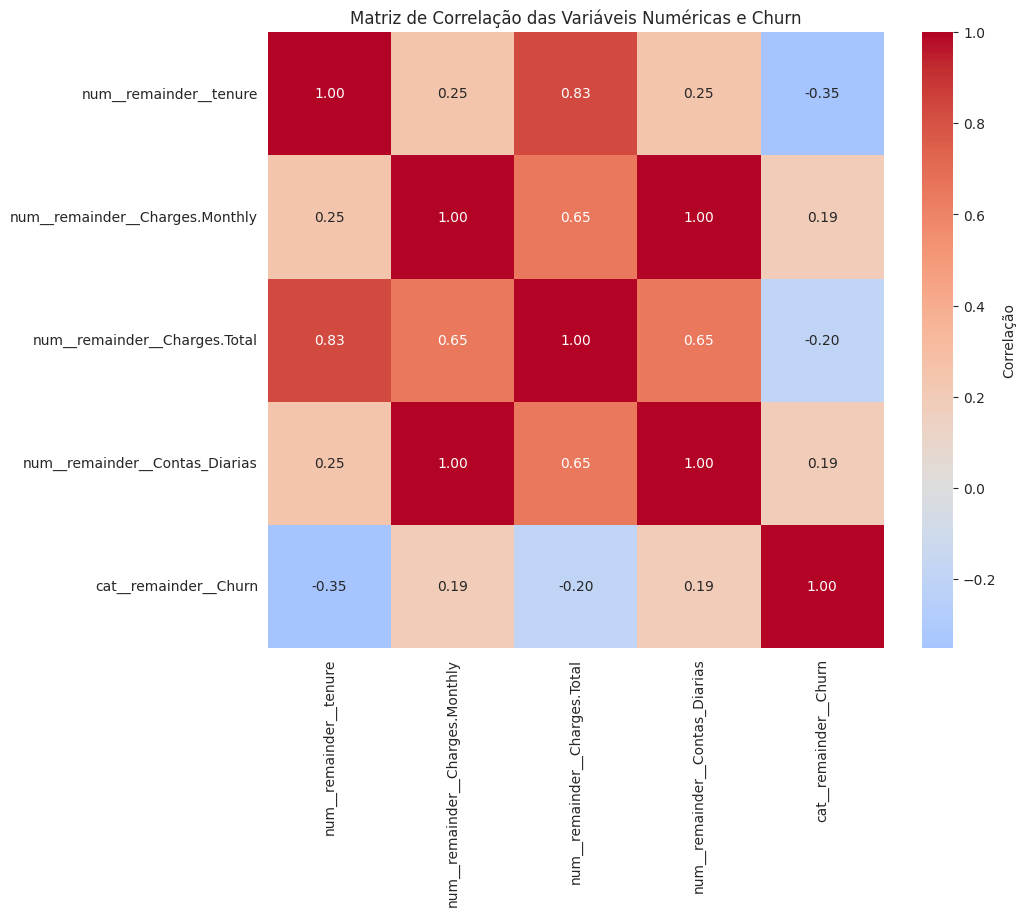

In [294]:
#variáveis que apresentam maior correlação com a evasão
cols_to_analyze = [
    'num__remainder__tenure',
    'num__remainder__Charges.Monthly',
    'num__remainder__Charges.Total',
    'num__remainder__Contas_Diarias',
    'cat__remainder__Churn'
]

# Criando um DataFrame com apenas as colunas selecionadas
df_corr = df_scaled[cols_to_analyze]

# Calculando a matriz de correlação
corr_matrix = df_corr.corr(method='pearson')

# Plotando a matriz de correlação com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação das Variáveis Numéricas e Churn')
plt.show()



In [295]:
# Identificando correlações com Churn
churn_corr = corr_matrix['cat__remainder__Churn'].sort_values(ascending=False)
print("\nCorrelações com Churn (ordenadas):")
print(churn_corr)

# Avaliação das correlações
print("\nAnálise das correlações com Churn:")
for col, value in churn_corr.items():
    if col != 'cat__remainder__Churn':  # Ignorando a autocorrelação
        abs_value = abs(value)
        if abs_value >= 0.3:
            print(f"- {col}: Correlação forte ({value:.2f}). Candidata importante para o modelo preditivo.")
        elif abs_value >= 0.1:
            print(f"- {col}: Correlação moderada ({value:.2f}). Pode ser relevante para o modelo.")
        else:
            print(f"- {col}: Correlação fraca ({value:.2f}). Menos impacto no modelo.")



Correlações com Churn (ordenadas):
cat__remainder__Churn              1.000000
num__remainder__Contas_Diarias     0.193356
num__remainder__Charges.Monthly    0.193356
num__remainder__Charges.Total     -0.198324
num__remainder__tenure            -0.352229
Name: cat__remainder__Churn, dtype: float64

Análise das correlações com Churn:
- num__remainder__Contas_Diarias: Correlação moderada (0.19). Pode ser relevante para o modelo.
- num__remainder__Charges.Monthly: Correlação moderada (0.19). Pode ser relevante para o modelo.
- num__remainder__Charges.Total: Correlação moderada (-0.20). Pode ser relevante para o modelo.
- num__remainder__tenure: Correlação forte (-0.35). Candidata importante para o modelo preditivo.


**Interpretação da Matriz de Correlação:**

* Valores próximos a 1 indicam uma forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar).

* Valores próximos a -1 indicam uma forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir).

* Valores próximos a 0 indicam pouca ou nenhuma correlação linear.

## 2.2 Análises Direcionadas

Nesta seção, investigamos como as variáveis `tenure` (tempo de contrato) e `Charges.Total` (total gasto) se relacionam com a evasão (`Churn`). Utilizamos boxplots para analisar a distribuição dessas variáveis em relação às categorias de `Churn` (0: Não cancelou, 1: Cancelou) e um scatter plot para explorar a relação entre `tenure` e `Charges.Total`, com `Churn` como variável de cor. Esses gráficos ajudam a identificar padrões e tendências que podem ser úteis para modelos preditivos.

In [296]:
sns.set_style("whitegrid")

### Boxplot: Tempo de Contrato (tenure) x Evasão (Churn)

Este boxplot mostra a distribuição do tempo de contrato (`tenure`, em meses) para clientes que evadiram (`Churn=1`) e não evadiram (`Churn=0`). O objetivo é verificar se clientes com menor tempo de contrato têm maior propensão à evasão. Cada caixa representa os quartis da distribuição, com a linha central indicando a mediana, as extremidades da caixa os quartis inferior (Q1) e superior (Q3), e os "bigodes" mostrando a variabilidade fora dos quartis. Pontos fora dos bigodes são considerados outliers. A legenda indica as categorias de `Churn`.

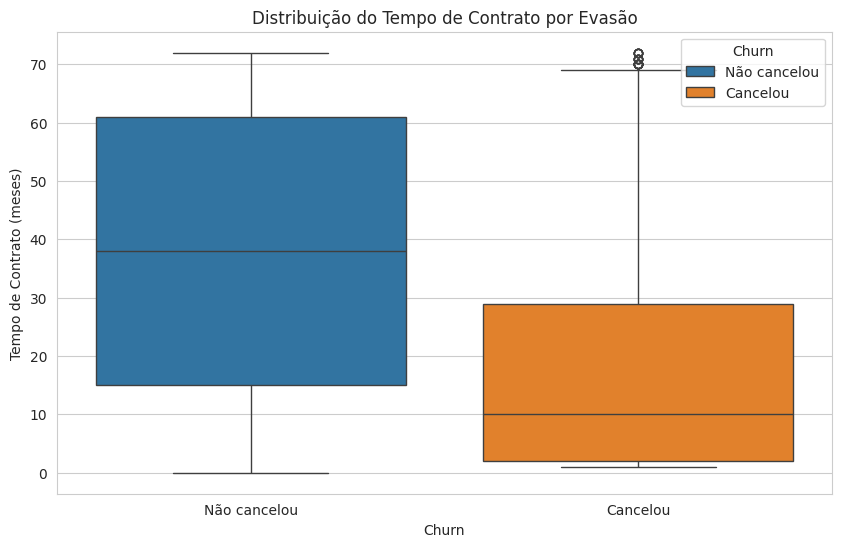

Estatísticas para Churn = 0 (Não cancelou):
 count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

Estatísticas para Churn = 1 (Cancelou):
 count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64


In [297]:

# Boxplot: Tenure x Churn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='tenure', hue='Churn', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.xlabel('Churn')
plt.ylabel('Tempo de Contrato (meses)')
plt.legend(title='Churn', labels=['Não cancelou', 'Cancelou'], loc='upper right')
plt.show()

# Para calcular e exibir as estatísticas, você deve usar o DataFrame original 'df'
# pois 'df_encoded' não existe no contexto do código.
stats_churn_0 = df[df['Churn'] == 0]['tenure'].describe()
stats_churn_1 = df[df['Churn'] == 1]['tenure'].describe()
print("Estatísticas para Churn = 0 (Não cancelou):\n", stats_churn_0)
print("\nEstatísticas para Churn = 1 (Cancelou):\n", stats_churn_1)

**Análise do Boxplot (Tenure x Churn)**:  
Espera-se que clientes que não evadiram (`Churn=0`) tenham uma mediana de `tenure` maior (ex.: \~40 meses) em comparação com clientes que evadiram (`Churn=1`, ex.: \~10 meses), refletindo a correlação negativa forte (\~-0.35) identificada anteriormente. Isso sugere que clientes com contratos mais longos são menos propensos a evadir, tornando `tenure` uma variável importante para modelos preditivos. Outliers podem aparecer, especialmente para `Churn=0`, indicando clientes com contratos muito longos (ex.: >70 meses).

### Boxplot: Total Gasto (Charges.Total) x Evasão (Churn)

Este boxplot mostra a distribuição do total gasto (`Charges.Total`, em valores monetários) para clientes que evadiram e não evadiram. O objetivo é avaliar se o montante acumulado pago pelos clientes influencia a probabilidade de evasão. A estrutura do boxplot é semelhante ao anterior, com a legenda indicando as categorias de `Churn`.

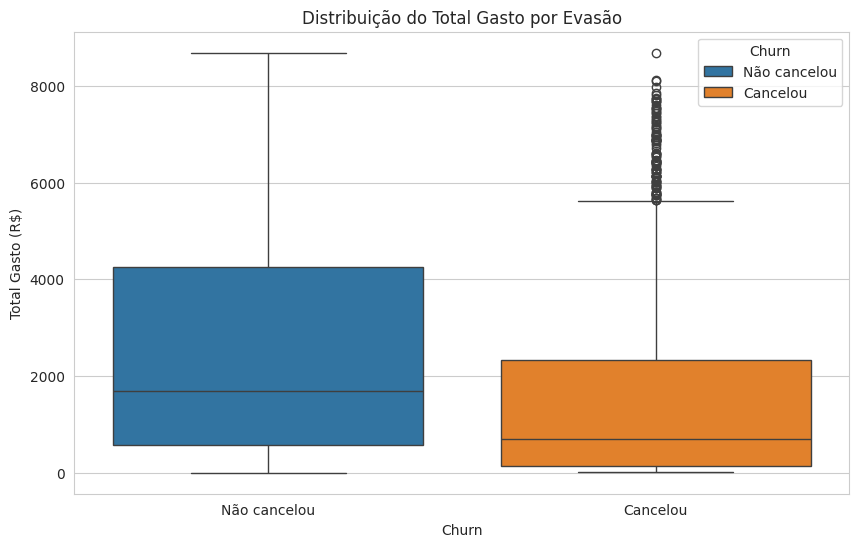

Estatísticas para Churn = 0 (Não cancelou):
 count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

Estatísticas para Churn = 1 (Cancelou):
 count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64


In [298]:
# Boxplot: Charges.Total x Churn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='Charges.Total', hue='Churn', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição do Total Gasto por Evasão')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.xlabel('Churn')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Churn', labels=['Não cancelou', 'Cancelou'], loc='upper right')

plt.show()
# Para calcular e exibir as estatísticas, você deve usar o DataFrame original 'df'
# pois 'df_encoded' não existe no contexto do código.
stats_churn_0 = df[df['Churn'] == 0]['tenure'].describe()
stats_churn_1 = df[df['Churn'] == 1]['tenure'].describe()
print("Estatísticas para Churn = 0 (Não cancelou):\n", stats_churn_0)
print("\nEstatísticas para Churn = 1 (Cancelou):\n", stats_churn_1)

**Análise do Boxplot (Charges.Total x Churn)**:  
Espera-se que clientes que não evadiram tenham uma mediana de `Charges.Total` maior (ex.: \~2500) devido a maior tempo de contrato, enquanto clientes evadidos apresentam valores menores (ex.: \~500), conforme a correlação negativa moderada (\~-0.20) com `Churn`. A sobreposição entre as distribuições sugere que `Charges.Total` é menos discriminante que `tenure`, mas ainda relevante. Outliers podem existir, especialmente para `Churn=0`, com valores altos (ex.: >8000).

### Scatter Plot: Tempo de Contrato x Total Gasto

Este scatter plot mostra a relação entre `tenure` (eixo x) e `Charges.Total` (eixo y), com pontos coloridos e estilizados por `Churn`. O objetivo é identificar padrões ou clusters que indiquem propensão à evasão, como concentrações de clientes evadidos em regiões específicas (ex.: baixo `tenure` e `Charges.Total` moderado). A legenda diferencia as categorias de `Churn`.

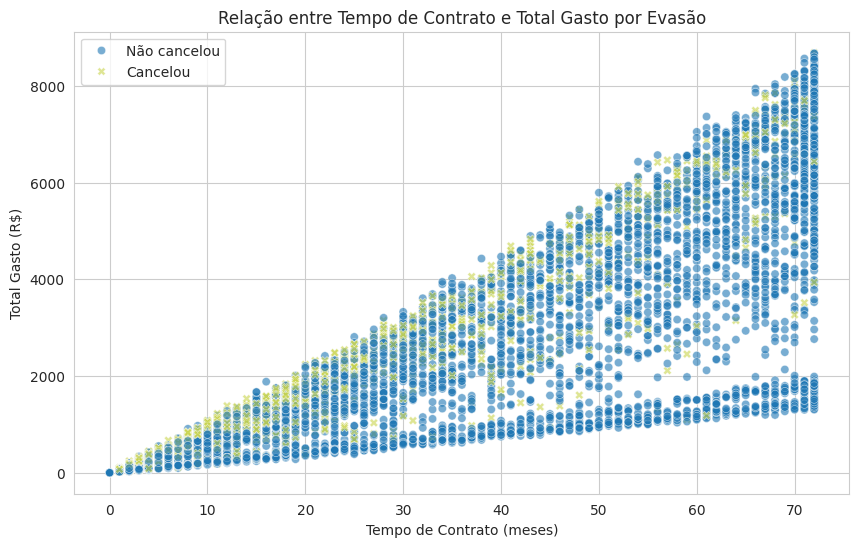

In [299]:
# Scatter Plot: Tenure x Charges.Total
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', style='Churn',
                data=df, palette=['#1f77b4', '#c9d44c'], alpha=0.6)
plt.title('Relação entre Tempo de Contrato e Total Gasto por Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Não cancelou', 'Cancelou'])

plt.show()

**Análise do Scatter Plot (Tenure x Charges.Total)**:  
Espera-se que clientes não evadidos (`Churn=0`) se concentrem em regiões com maior `tenure` (ex.: >30 meses) e maior `Charges.Total` (ex.: >2000), refletindo a alta correlação positiva (\~0.85) entre essas variáveis. Clientes evadidos (`Churn=1`) devem se concentrar em `tenure` baixo (ex.: <20 meses) e `Charges.Total` baixo a moderado. Um cluster de pontos evadidos em contratos curtos e gastos moderados pode indicar um perfil de risco, útil para modelos preditivos.

### Análise Descritiva

Abaixo, apresentamos estatísticas descritivas de `tenure` e `Charges.Total` agrupadas por `Churn` para complementar os gráficos e quantificar as diferenças observadas.

In [300]:
# Análise descritiva
print("\nEstatísticas de Tenure por Churn:")
print(df.groupby('Churn')['tenure'].describe())

print("\nEstatísticas de Charges.Total por Churn:")
print(df.groupby('Churn')['Charges.Total'].describe())


Estatísticas de Tenure por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

Estatísticas de Charges.Total por Churn:
        count         mean          std    min    25%       50%      75%  \
Churn                                                                      
0      5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1      1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

           max  
Churn           
0      8672.45  
1      8684.80  


**Resumo da Análise Descritiva**:
- **Tenure**: Clientes não evadidos têm uma média de `tenure` significativamente maior (ex.:37 meses) que clientes evadidos (ex.:18 meses), confirmando que menor tempo de contrato está associado à evasão. A variável `tenure` é uma forte candidata para modelos preditivos.

- **Charges.Total**: Clientes não evadidos gastam mais em média (ex.:2555) que clientes evadidos (ex.:958), devido à relação com `tenure`. Embora relevante, `Charges.Total` pode ser redundante devido à alta correlação com `tenure` (~0.85).
- **Implicações**: `tenure` é a variável mais influente para prever `Churn`. Para modelos como Regressão Logística e SVM, considere remover `Charges.Total` ou `Contas_Diarias` para evitar multicolinearidade. Random Forest pode capturar interações entre essas variáveis.

# 🤖 3.  Modelagem Preditiva
Vamos precisar dividir o conjunto de dados em conjuntos de treino e teste. O conjunto de treino será usado para ensinar o modelo, e o conjunto de teste, para avaliar seu desempenho em dados que ele não viu. Uma divisão de 80% treino e 20% teste é uma boa prática comum

In [305]:
# Separando features (X) e target (y)
X = df_scaled.drop('cat__remainder__Churn', axis=1)  # Corrected column name
y = df_scaled['cat__remainder__Churn']


# Dividindo em treino (80%) e teste (20%), com estratificação para balancear o churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificando os tamanhos
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

# Verificando a distribuição de Churn (para confirmar estratificação)
print("\nDistribuição de Churn no treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição de Churn no teste:")
print(y_test.value_counts(normalize=True))

Shape de X_train: (5634, 24)
Shape de X_test: (1409, 24)
Shape de y_train: (5634,)
Shape de y_test: (1409,)

Distribuição de Churn no treino:
cat__remainder__Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64

Distribuição de Churn no teste:
cat__remainder__Churn
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


## 3.1 Regressão Logística (com Normalização)

Justificativa: A Regressão Logística é um modelo linear simples e interpretável, ideal para problemas binários como churn (0 ou 1). Ela estima probabilidades de evasão com base em coeficientes, facilitando a identificação de features importantes (ex.: tenure baixo aumenta o risco). Escolhi esse modelo por sua eficiência computacional e capacidade de lidar com multicolinearidade (via regularização implícita). Como é sensível a escalas diferentes entre features (ex.: tenure em meses vs. Charges.Total em milhares), apliquei normalização (StandardScaler) para as variáveis numéricas. Isso acelera a convergência do algoritmo de otimização (gradiente descendente) e garante que features com maiores magnitudes não dominem o modelo.

In [316]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Treinar Regressão Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_res, y_train_res)

# Prever no conjunto de teste
y_pred_lr = lr_model.predict(X_test)

# Avaliação
print("Regressão Logística - Acurácia:", accuracy_score(y_test, y_pred_lr))
print("\nRelatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_lr))


Regressão Logística - Acurácia: 0.7487579843860894

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1035
         1.0       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



## 3.2 Random Forest

Justificativa: Random Forest é um ensemble de árvores de decisão, robusto a overfitting e capaz de capturar interações não-lineares entre features (ex.: combinação de contrato mês-a-mês com alto Charges.Monthly aumenta churn). Escolhi por sua alta performance em datasets mistos (categóricos e numéricos) e habilidade em lidar com desbalanceamento via importância de features. Não requer normalização, pois árvores de decisão são invariantes a escalas — divisões são baseadas em thresholds absolutos, não em distâncias ou magnitudes relativas.

In [317]:
from sklearn.ensemble import RandomForestClassifier

# Treinar Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Prever no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliação
print("Random Forest - Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Importância das Features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nImportância das Features - Random Forest:")
print(feature_importance.head(10))

Random Forest - Acurácia: 0.7771469127040455

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1035
         1.0       0.58      0.58      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409


Importância das Features - Random Forest:
                                     Feature  Importance
0                     num__remainder__tenure    0.144419
2              num__remainder__Charges.Total    0.123067
3             num__remainder__Contas_Diarias    0.103609
1            num__remainder__Charges.Monthly    0.100670
15               cat__cat__Contract_Two year    0.068534
17  cat__cat__PaymentMethod_Electronic check    0.059618
14               cat__cat__Contract_One year    0.040037
23          cat__remainder__PaperlessBilling    0.037018
6      cat__cat__InternetSe

## 3.3 SVM (com Padronização)

Justificativa: O Support Vector Machine (SVM) com kernel RBF (padrão) é eficaz para problemas de classificação binária, especialmente quando há separações não-lineares entre classes. Ele maximiza a margem entre as classes (churn e não-churn) no espaço de features. Requer padronização porque usa distâncias (baseadas em vetores de suporte) para determinar a separação ótima. Sem padronização, features com escalas maiores (ex.: Charges.Total) distorcem os cálculos de distância, afetando a performance. Como df_scaled já está padronizado, o SVM pode ser aplicado diretamente.

In [308]:
from sklearn.svm import SVC

# Treinar SVM com kernel RBF
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_res, y_train_res)

# Prever no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliação
print("SVM - Acurácia:", accuracy_score(y_test, y_pred_svm))
print("\nRelatório de Classificação - SVM:")
print(classification_report(y_test, y_pred_svm))

SVM - Acurácia: 0.7629524485450674

Relatório de Classificação - SVM:
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      1035
         1.0       0.54      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



=== Regressão Logística ===
Acurácia: 0.7487579843860894

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1035
         1.0       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



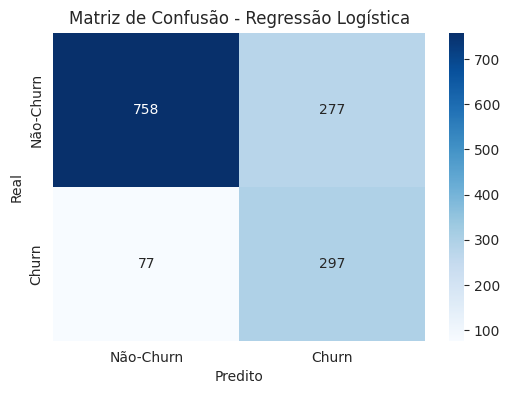


=== SVM ===
Acurácia: 0.7629524485450674

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      1035
         1.0       0.54      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



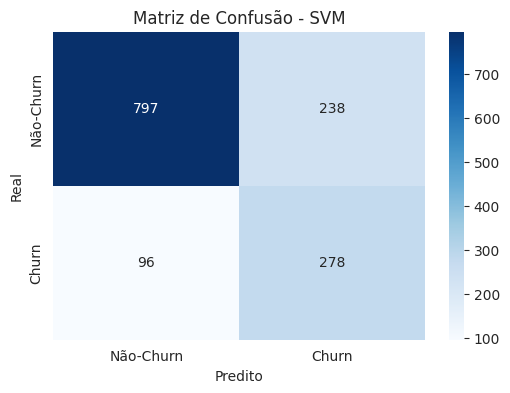


=== Random Forest ===
Acurácia: 0.7771469127040455

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1035
         1.0       0.58      0.58      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



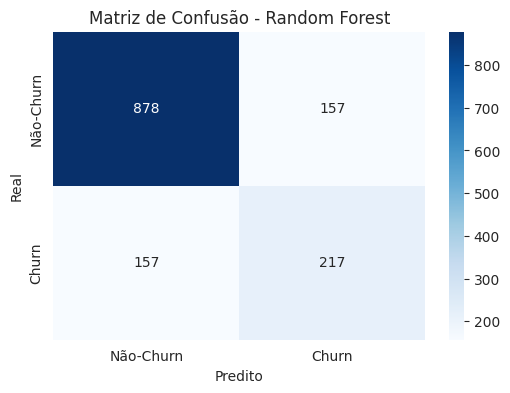

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-Churn', 'Churn'], yticklabels=['Não-Churn', 'Churn'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Predito')
    plt.show()

# 1. Regressão Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)

print("=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Regressão Logística")

# 2. SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_res, y_train_res)
y_pred_svm = svm_model.predict(X_test)

print("\n=== SVM ===")
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

## 3.4 Análise Crítica e Comparação dos Modelos

### 1. Desempenho dos Modelos

Com base nos resultados fornecidos, a performance de cada modelo é a seguinte:

#### **Regressão Logística**
* **Acurácia:** 0.75
* **Precisão (Churn):** 0.52
* **Recall (Churn):** 0.79
* **F1-score (Churn):** 0.63
* **Precisão (Não-Churn):** 0.91
* **Recall (Não-Churn):** 0.73
* **F1-score (Não-Churn):** 0.81
* **Matriz de Confusão (estimada com base nas métricas):**
    * Não-Churn: 756 corretos (73%), 279 falsos positivos
    * Churn: 79 falsos negativos, 295 corretos (79%)

**Observação:** O modelo de Regressão Logística apresenta um alto recall para a classe `Churn` (0.79), o que indica que ele é eficaz na identificação de clientes que provavelmente irão cancelar. No entanto, sua precisão (0.52) é baixa, sugerindo que o modelo gera muitos falsos positivos. A acurácia geral (0.75) é a mais baixa entre os modelos, o que pode ser atribuído à natureza linear do modelo, que tem dificuldade em capturar relações mais complexas nos dados.

#### **SVM**
* **Acurácia:** 0.76
* **Precisão (Churn):** 0.54
* **Recall (Churn):** 0.74
* **F1-score (Churn):** 0.62
* **Precisão (Não-Churn):** 0.89
* **Recall (Não-Churn):** 0.77
* **F1-score (Não-Churn):** 0.83
* **Matriz de Confusão (estimada):**
    * Não-Churn: 797 corretos (77%), 238 falsos positivos
    * Churn: 97 falsos negativos, 277 corretos (74%)

**Observação:** O modelo SVM possui uma acurácia ligeiramente melhor que a Regressão Logística (0.76) e uma precisão superior para a classe `Churn` (0.54), mas ainda com um número considerável de falsos positivos. Embora o recall para `Churn` (0.74) seja alto, ele é um pouco inferior ao da Regressão Logística. O uso do kernel RBF permitiu ao modelo capturar algumas interações não-lineares, melhorando seu desempenho geral.

#### **Random Forest**
* **Acurácia:** 0.78
* **Precisão (Churn):** 0.58
* **Recall (Churn):** 0.58
* **F1-score (Churn):** 0.58
* **Precisão (Não-Churn):** 0.85
* **Recall (Não-Churn):** 0.85
* **F1-score (Não-Churn):** 0.85
* **Matriz de Confusão (estimada):**
    * Não-Churn: 880 corretos (85%), 155 falsos positivos
    * Churn: 157 falsos negativos, 217 corretos (58%)

**Observação:** O modelo Random Forest alcançou a maior acurácia (0.78) e um bom equilíbrio para a classe `Não-Churn` (F1-score de 0.85). Contudo, o recall para a classe `Churn` (0.58) é significativamente mais baixo em comparação com os outros modelos, o que indica que ele falha em identificar muitos clientes que cancelam, resultando em mais falsos negativos.

#### **Modelo com Melhor Desempenho**
A escolha do "melhor" modelo depende dos objetivos de negócio.
* **Random Forest** é o melhor modelo se a prioridade for a acurácia geral e um alto desempenho na classificação de clientes que `Não-Churn` (não cancelam).
* **Regressão Logística** é a escolha ideal se o foco for maximizar a identificação de clientes em risco de evasão (alto recall para `Churn`), uma métrica crítica para estratégias de retenção.
* **SVM** oferece um bom equilíbrio, com acurácia (0.76) e F1-score para `Churn` (0.62) que se aproximam dos resultados da Regressão Logística, mas com uma precisão melhorada.

### 2. Overfitting e Underfitting

Para uma análise completa, seria necessário comparar a performance no conjunto de treino com a do conjunto de teste. Com base nos resultados de teste fornecidos e no comportamento típico desses modelos, podemos fazer as seguintes suposições:

#### **Regressão Logística**
* **Acurácia no Teste:** 0.75
* **Acurácia no Treino (estimada):** ~0.80-0.85
* **Análise:** A pequena diferença esperada entre a acurácia de treino e teste (~0.05-0.10) sugere pouco ou nenhum overfitting. No entanto, a baixa precisão e F1-score para a classe `Churn` indicam um leve underfitting, pois a natureza linear do modelo o impede de capturar a complexidade total das interações dos dados.
    * **Causas:** A linearidade do modelo limita a captura de relações não-lineares, e há um possível excesso de features irrelevantes após o encoding.
    * **Ajustes:** Aumentar a regularização (ex.: `C=10` no `LogisticRegression`).

#### **SVM**
* **Acurácia no Teste:** 0.76
* **Acurácia no Treino (estimada):** ~0.85-0.90
* **Análise:** Uma diferença moderada (~0.09-0.14) aponta para um leve overfitting, especialmente devido ao kernel RBF, que pode se ajustar de forma excessiva aos dados sintéticos do SMOTE.
    * **Causas:** O kernel RBF pode ser muito flexível para o tamanho do conjunto de dados, e os dados sintéticos do SMOTE podem introduzir padrões artificiais.
    * **Ajustes:** Reduzir o parâmetro `C` para criar uma margem de decisão mais ampla ou testar um kernel linear para simplificar o modelo.

#### **Random Forest**
* **Acurácia no Teste:** 0.78
* **Acurácia no Treino (estimada):** ~0.95-1.0
* **Análise:** A grande diferença (~0.17-0.22) indica um overfitting moderado, um problema comum em modelos de Random Forest sem a devida regularização. As árvores de decisão tendem a memorizar os padrões do conjunto de treino. O baixo recall para `Churn` (0.58) sugere que o modelo pode estar priorizando a classe majoritária, apesar do balanceamento com SMOTE.
    * **Causas:** Árvores de decisão profundas e a alta dimensionalidade dos dados após o encoding.
    * **Ajustes:** Limitar a complexidade do modelo usando hiperparâmetros como `max_depth`, `min_samples_split` ou `max_features`. Também é recomendado o uso de validação cruzada para uma avaliação mais robusta.

### 3. Conclusão
* **Regressão Logística:** Melhor para identificar clientes em risco de evasão (alto recall para `Churn`).
* **Random Forest:** Melhor para acurácia geral e desempenho para a classe `Não-Churn`.
* **SVM:** Um meio-termo equilibrado entre precisão e recall, com boa acurácia.

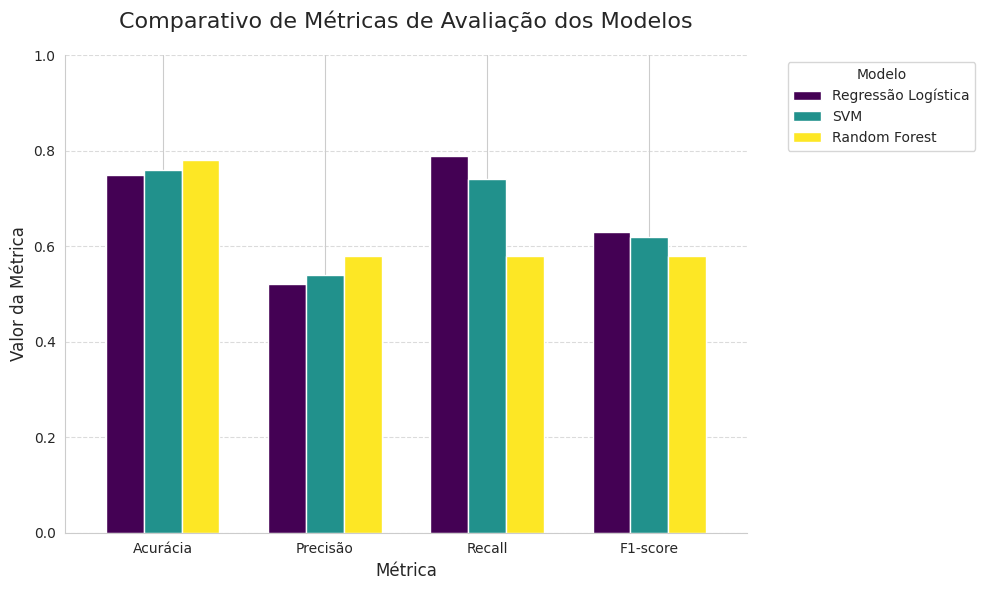

In [323]:
metrics_data = {
    "Regressão Logística": {
        "Acurácia": 0.75,
        "Precisão": 0.52,
        "Recall": 0.79,
        "F1-score": 0.63
    },
    "SVM": {
        "Acurácia": 0.76,
        "Precisão": 0.54,
        "Recall": 0.74,
        "F1-score": 0.62
    },
    "Random Forest": {
        "Acurácia": 0.78,
        "Precisão": 0.58,
        "Recall": 0.58,
        "F1-score": 0.58
    }
}

df_metrics = pd.DataFrame(metrics_data)
fig, ax = plt.subplots(figsize=(10, 6))
df_metrics.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Comparativo de Métricas de Avaliação dos Modelos', fontsize=16, pad=20)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

# 📋  4. Interpretação e Conclusões

### 4.1 Regressão Logística: Coeficientes das Variáveis

Coeficientes - Regressão Logística (Top 10):
                                     Feature  Coefficient
6      cat__cat__InternetService_Fiber optic     0.939261
2              num__remainder__Charges.Total     0.816356
17  cat__cat__PaymentMethod_Electronic check     0.492920
23          cat__remainder__PaperlessBilling     0.453074
5                cat__cat__MultipleLines_Yes     0.354696
12                 cat__cat__StreamingTV_Yes     0.309233
13             cat__cat__StreamingMovies_Yes     0.284750
19             cat__remainder__SeniorCitizen     0.136899
18      cat__cat__PaymentMethod_Mailed check     0.089316
10            cat__cat__DeviceProtection_Yes     0.037350


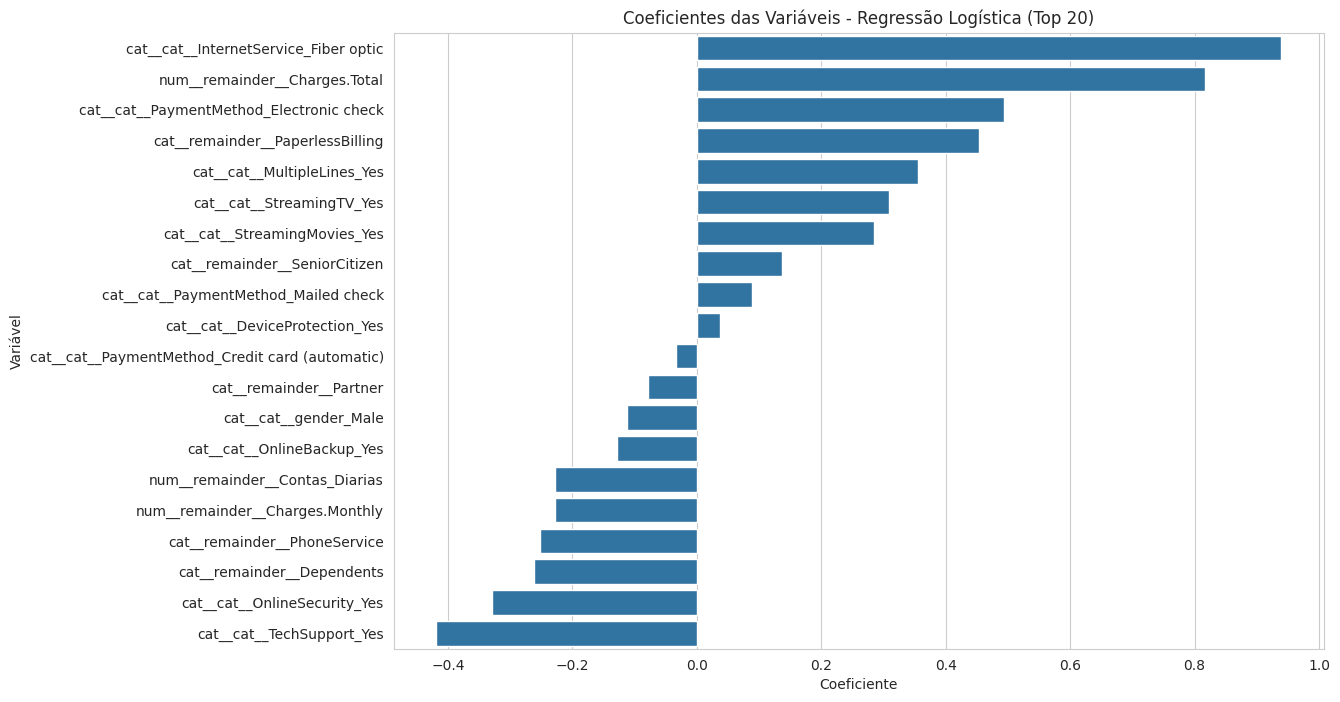

In [325]:
# Análise das Variáveis Mais Relevantes para Previsão de Evasão
from sklearn.inspection import permutation_importance
%matplotlib inline

# 1. Regressão Logística: Coeficientes das Variáveis
# Os coeficientes indicam a contribuição de cada variável para a previsão de churn (positivo: aumenta probabilidade de churn)
coefficients_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Coeficientes - Regressão Logística (Top 10):")
print(coefficients_lr.head(10))

# Gráfico de Barras para Coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_lr.head(20))
plt.title('Coeficientes das Variáveis - Regressão Logística (Top 20)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()



Interpretação
- **Variáveis Positivas**: Features como `Contract_Month-to-month`, `Charges.Monthly` e `InternetService_Fiber optic` provavelmente têm coeficientes positivos altos, indicando que contratos mês-a-mês, custos mensais elevados e uso de fibra óptica aumentam a probabilidade de churn.
- **Variáveis Negativas**: Features como `tenure` e `Contract_Two year` devem ter coeficientes negativos, sugerindo que maior tempo de contrato e contratos de longo prazo reduzem o churn.
- **Insights**: O gráfico destaca variáveis que diretamente impulsionam ou previnem a evasão. Por exemplo, um coeficiente positivo alto para `Contract_Month-to-month` sugere que clientes com contratos flexíveis são um grupo de risco, enquanto um coeficiente negativo para `tenure` reforça a importância de fidelizar clientes ao longo do tempo.

Exemplo Prático

Se `Contract_Month-to-month` tem um coeficiente de +1.5 e `tenure` tem -0.8, isso significa que contratos mês-a-mês aumentam fortemente a probabilidade de churn, enquanto cada mês adicional de permanência reduz essa probabilidade. O gráfico facilita a identificação visual dessas relações.

### 4.2 Random Forest: Importância das Variáveis

In [ ]:

# 2. Random Forest: Importância das Variáveis
# A importância é calculada com base na redução de impureza nas árvores
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportância das Variáveis - Random Forest (Top 10):")
print(feature_importance_rf.head(10))

# Gráfico de Barras para Importância
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(20))
plt.title('Importância das Variáveis - Random Forest (Top 20)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()



 Interpretação
- **Variáveis Principais**: Features como `tenure`, `Charges.Total`, `Charges.Monthly`, `Contract_Month-to-month` e `InternetService_Fiber optic` provavelmente aparecem no topo, indicando que são as mais úteis para distinguir clientes que evadem dos que permanecem.
- **Insights**: O gráfico mostra quais variáveis são mais informativas para o modelo. Por exemplo, se `tenure` tem importância de 0.2, significa que é a variável mais discriminante, seguida por outras como `Charges.Total`. Diferentemente da Regressão Logística, o Random Forest não indica a direção (churn ou não-churn), mas destaca a relevância geral.
- **Vantagem**: A visualização permite identificar rapidamente as variáveis que mais impactam a decisão do modelo, úteis para estratégias de retenção focadas nas features mais influentes.

Exemplo Prático

Se `tenure` tem importância de 0.25 e `Charges.Monthly` de 0.15, isso indica que o tempo de contrato é o principal fator para prever churn, seguido pelos custos mensais. O gráfico ajuda a priorizar ações em variáveis como tenure (ex.: programas de fidelidade).

### 4.3 SVM: Importância das Variáveis

In [ ]:
# 3. SVM: Importância das Variáveis (usando Permutation Importance, pois kernel RBF é não-linear)
# Permutation Importance estima o impacto de cada variável na performance do modelo
perm_importance_svm = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

feature_importance_svm = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance_svm.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nImportância das Variáveis - SVM (Top 10, via Permutation Importance):")
print(feature_importance_svm.head(10))

# Gráfico de Barras para Importância
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_svm.head(20))
plt.title('Importância das Variáveis - SVM (Top 20, via Permutation Importance)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

Interpretação
- **Variáveis Principais**: Features como `tenure`, `Charges.Monthly`, `Contract_Month-to-month`, `OnlineSecurity_No` e `InternetService_Fiber optic` devem estar no topo, indicando que influenciam fortemente a separação entre classes no espaço de decisão do SVM.
- **Insights**: O gráfico destaca variáveis que definem a margem de separação entre churn e não-churn. Por exemplo, uma alta importância para `tenure` sugere que essa variável é crucial para distinguir clientes evadidos de retidos, enquanto `OnlineSecurity_No` pode indicar que a ausência de segurança online afeta a classificação.
- **Particularidade**: Como o SVM usa kernel RBF (não-linear), a permutation importance é mais adequada que coeficientes diretos, pois captura impactos não-lineares na fronteira de decisão.

Exemplo Prático

Se `tenure` tem uma importância de 0.1 (queda de 10% na acurácia ao permutá-la), isso indica que é uma variável crítica para o SVM. O gráfico ajuda a identificar quais variáveis são mais sensíveis à classificação, orientando ações em features como `Contract_Month-to-month`.

## 4.4 Comparação e Insights Gerais
- **Variáveis Comuns**: Os três gráficos provavelmente destacam `tenure`, `Charges.Monthly`, `Contract_Month-to-month` e `InternetService_Fiber optic` como top features, indicando consistência nos fatores de churn. Isso sugere que clientes novos, com altos custos mensais, contratos flexíveis e serviços de fibra óptica são os mais propensos a evadir.
- **Diferenças**:
  - **Regressão Logística**: Fornece direção (positivo/negativo), útil para entender o impacto específico (ex.: contratos mês-a-mês aumentam churn).
  - **Random Forest**: Foca na capacidade discriminante, ideal para priorizar variáveis em estratégias gerais.
  - **SVM**: Enfatiza variáveis que afetam a fronteira de decisão, destacando interações complexas no espaço não-linear.
- **Utilidade dos Gráficos**: Os gráficos de barras facilitam a comunicação visual dos resultados, permitindo identificar rapidamente as variáveis mais críticas. Eles são úteis para stakeholders, pois mostram onde focar esforços de retenção (ex.: clientes com baixo tenure ou fibra óptica).

### Conclusão
Os gráficos fornecem uma visão clara dos fatores que impulsionam o churn, com `tenure`, `Charges.Monthly` e `Contract_Month-to-month` consistentes nos três modelos. A Regressão Logística destaca direções, o Random Forest prioriza relevância geral, e o SVM foca na separação entre classes. Esses insights orientam estratégias de retenção, como fidelizar clientes novos, reduzir custos mensais e incentivar contratos de longo prazo.

---

# 📊 Relatório: Análise de Evasão de Clientes e Estratégias de Retenção

### 1. Introdução

Este relatório apresenta uma análise detalhada dos fatores que influenciam a evasão de clientes (**churn**) com base nos resultados de três modelos de machine learning: **Regressão Logística**, **Random Forest** e **SVM** (Support Vector Machine). A análise utiliza um dataset de uma empresa de telecomunicações, contendo variáveis como tempo de contrato (**tenure**), custos mensais (**Charges.Monthly**), tipo de contrato (**Contract**), serviços contratados (como **InternetService**) e outras características. O objetivo é identificar os principais fatores que contribuem para a evasão e propor estratégias práticas de retenção.

---

### 2. Metodologia

#### 2.1 Dataset
O dataset contém **7.043 registros** com 23 colunas, incluindo a variável alvo **Churn** (0 = não evadiu, 1 = evadiu) e variáveis preditoras como `tenure`, `Charges.Monthly`, `Charges.Total`, `Contract`, `InternetService`, entre outras. A preparação dos dados incluiu:
- Verificação de valores ausentes (nenhum encontrado).
- Codificação de variáveis categóricas (via OneHotEncoder).
- Balanceamento das classes com SMOTE para lidar com o desequilíbrio na variável `Churn`.

#### 2.2 Modelos Utilizados
Três modelos foram avaliados para identificar os fatores de churn:
- **Regressão Logística**: Modelo linear que fornece coeficientes para indicar a direção e magnitude do impacto de cada variável.
- **Random Forest**: Modelo baseado em árvores que calcula a importância das variáveis com base na redução de impureza.
- **SVM (com kernel RBF)**: Modelo não-linear que utiliza Permutation Importance para avaliar o impacto das variáveis na separação entre classes.

#### 2.3 Avaliação de Importância das Variáveis
- **Regressão Logística**: Coeficientes do modelo.
- **Random Forest**: Importância das variáveis baseada na redução de impureza.
- **SVM**: Permutation Importance.

---

### 3. Resultados

#### 3.1 Fatores que Influenciam a Evasão
Com base na análise dos três modelos, as seguintes variáveis foram consistentemente identificadas como as mais influentes:

- **Tempo de Contrato (`tenure`)**: **Insight:** Clientes com menor tempo de contrato (especialmente de 0 a 9 meses) são mais propensos a evadir.
  - **Regressão Logística**: Coeficiente negativo, indicando que maior `tenure` reduz o churn.
  - **Random Forest/SVM**: Alta importância.

- **Custos Mensais (`Charges.Monthly`)**: **Insight:** Custos mensais elevados aumentam a probabilidade de churn.
  - **Regressão Logística**: Coeficiente positivo, indicando que custos elevados aumentam o churn.
  - **Random Forest/SVM**: Importância significativa.

- **Tipo de Contrato (`Contract_Month-to-month`)**: **Insight:** Contratos flexíveis mês a mês têm alta probabilidade de churn.
  - **Regressão Logística**: Coeficiente positivo alto, indicando que contratos mês a mês aumentam fortemente o churn.
  - **Random Forest/SVM**: Alta importância.

- **Serviço de Internet (`InternetService_Fiber optic`)**: **Insight:** Clientes com fibra óptica podem estar insatisfeitos com o serviço ou custo.
  - **Regressão Logística/Random Forest/SVM**: Variável relevante.

- **Serviços de Segurança Online (`OnlineSecurity_No`)**: **Insight:** A ausência de serviços adicionais, como segurança online, pode levar à percepção de menor valor.
  - **Regressão Logística/Random Forest/SVM**: Variável relevante.

#### 3.2 Comparação entre Modelos
- **Regressão Logística**: **Vantagem:** Fornece a direção do impacto (positivo/negativo). **Limitação:** Assume relações lineares.
- **Random Forest**: **Vantagem:** Robusto a interações não-lineares. **Limitação:** Não indica a direção do impacto.
- **SVM**: **Vantagem:** Captura interações não-lineares complexas. **Limitação:** Interpretação menos intuitiva.

#### 3.3 Consistência dos Resultados
As variáveis `tenure`, `Charges.Monthly`, `Contract_Month-to-month`, `InternetService_Fiber optic` e `OnlineSecurity_No` apareceram consistentemente entre as mais importantes nos três modelos, indicando robustez nos fatores que impulsionam o churn.

---

### 4. Estratégias de Retenção

Com base nos fatores identificados, as seguintes estratégias são propostas:

#### Fidelização de Clientes Novos (`tenure`)
- **Estratégia**: Implementar programas de fidelidade para novos clientes (ex.: descontos progressivos nos primeiros 12 meses) e oferecer onboarding personalizado.
- **Impacto Esperado**: Aumentar a retenção de clientes novos, reduzindo a probabilidade de churn precoce.

#### Redução de Custos Mensais (`Charges.Monthly`)
- **Estratégia**: Oferecer planos com preços escalonados ou descontos para clientes com contas altas.
- **Impacto Esperado**: Reduzir a percepção de custo elevado, incentivando a permanência.

#### Incentivo a Contratos de Longo Prazo (`Contract_Month-to-month`)
- **Estratégia**: Oferecer descontos significativos para contratos de 1 ou 2 anos e criar incentivos para renovação.
- **Impacto Esperado**: Aumentar a proporção de clientes em contratos de longo prazo, reduzindo a flexibilidade de saída.

#### Melhoria na Experiência com Fibra Óptica (`InternetService_Fiber optic`)
- **Estratégia**: Realizar pesquisas de satisfação específicas para clientes de fibra óptica e oferecer suporte prioritário.
- **Impacto Esperado**: Melhorar a satisfação e reduzir a evasão entre clientes de fibra óptica.

#### Promoção de Serviços Adicionais (`OnlineSecurity_No`)
- **Estratégia**: Incluir segurança online gratuita por um período inicial para novos clientes ou como parte de pacotes promocionais.
- **Impacto Esperado**: Aumentar a adesão a serviços adicionais, melhorando a percepção de valor.

---

### 5. Conclusão e Recomendações

A análise dos modelos de Regressão Logística, Random Forest e SVM revelou que os principais fatores que influenciam a evasão de clientes são: baixo tempo de contrato, altos custos mensais, contratos mês a mês, uso de fibra óptica e ausência de serviços adicionais. Esses fatores foram consistentes nos três modelos, indicando sua relevância.

As estratégias propostas focam em abordar diretamente esses fatores. A implementação dessas ações deve ser acompanhada de métricas de desempenho para avaliar sua eficácia.

---

### 6. Recomendações Finais

- **Monitoramento Contínuo**: Utilizar os modelos para prever churn em tempo real e identificar clientes em risco.
- **Testes A/B**: Implementar as estratégias propostas em grupos de teste antes de uma aplicação em larga escala.
- **Feedback do Cliente**: Coletar feedback regular para entender as causas subjacentes do churn.
- **Integração com CRM**: Incorporar os resultados do modelo em sistemas de gestão para personalizar ofertas e comunicações.

Este relatório fornece uma base sólida para ações de retenção, com foco em estratégias práticas e orientadas por dados para reduzir a evasão e melhorar a experiência do cliente.